# Analyze the TMDb movie dataset 🎞

---


### A successful movie not only entertains the audience but also brings tremendous profit to movie companies.💰 


The TMDb Movie dataset is a collection of information on around 10000 movies. For each movie, the dataset includes information on aspects such as popularity, budget, revenue, directors, and other.

## *Outline of analysis*
>* Explore the data and ask research questions that could be answered using the data.
>* Performed necessary assesing and  cleaning steps to unify formats, deal with data problems and prepare the dataset for analysis using pandas.
>* Created visualizations using matplotlib and made inferences to answer research questions.





### We will analyze data for the last ten years in order to answer these questions:
* What movie genre has had the most popularity in the last ten year?
* What is the rate of budget per genre in the last ten years?
* Is there a relationship between popularity and average vote?
* Which genre has the highest number of movies generated in the last five years?

In [1]:
# import the needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

### Load the ***tmdb movies*** dataset

In [11]:
# load the dataset data
df = pd.read_csv('tmdb-movies.csv')

### Data Exploration

In [12]:
# print out the first five rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
# how many rows and columns are in the data
df.shape

(10866, 21)

In [14]:
# a glimpse of columns datatype and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [15]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [16]:
# check for missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [17]:
# check for duplicate data
df.duplicated().sum()

1

In [18]:
# check the minimim value in the budget and revenue columns
print(df.budget.unique().min())
print(df.revenue.unique().min())

0
0


### Data assising cell: 
From data exploring that we did above here is our note:
1. we have ten unwanted columns:
> 1. 'imdb_id'
> 2.'homepage'
> 3.'cast'
> 4.'keywords'
> 5.'tagline'
> 6.'production_companies'
> 7.'overview'
> 8.'release_date'
> 9.'budget_adj'
> 10.'revenue_adj'


2. Some columns have wrong values:
> *revenue and budget* column have 0 values which is impossible.

3. Some columns have missing values:
> 1. director
> 2. genres

4. There are one duplicated row 


5. Column with multiple values:
>genres column has multiple values separated by |.

----




### Cleaning Data 
####***First problem:*** unwanted columns
> drop the ten unwanted columns



In [19]:
# drop columns that don't have important information for helping me in the analysis 
column_list=['imdb_id','homepage','cast','keywords','tagline','production_companies'
        ,'overview','release_date','budget_adj','revenue_adj']
      
df.drop(column_list,axis=1,inplace=True)

In [20]:
# checking 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 933.9+ KB


In [21]:
# check that the columns deleted correctly
df.shape

(10866, 11)

####***Second problem:*** *revenue and budget* columns have wrong values
> fix this problem by replacing zeros with the mean of the column values


In [22]:
# replace 0s by mean in poth revenue and budget columns
revenue_mean = df['revenue'].mean()
budget_mean = df['budget'].mean()

df['revenue']=df['revenue'].replace(0,revenue_mean)
df['budget']=df['budget'].replace(0,budget_mean)

####***Third problem:*** *director and genres* columns have missing values
> removing rows with missing values in this two-column since they are not too many missing values, will have no effect on the analysis results

In [23]:
# check for missing values
df.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [24]:
# drop missing values and check
df.dropna(inplace=True)
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

####***Fourth problem:*** There are one duplicate row
> drop the duplicate row

In [25]:
# check for duplicate rows
df.duplicated().sum()

1

In [26]:
# drop duplicated rows and check
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

####***Fifth problem:*** *genres* column has multiple values
> transform the *genres* column to make it easier to work with.
> we can't group movies by one specific genre with the currently *genres* column values

>we will follow these steps:
1. turn the strings on the genres column into a list.
2. create a new table by separating the items of the genres column
3. merge the two tables.
4. pivot the genre values so that they are presented in their rows instead of columns.
5. remove the original *genres and variable* columns (unnecessary columns for analysis).
6. drop all rows with missing values.


In [27]:
#turn string into list
df['genres']=df['genres'].str.split("|")

In [28]:
# checking
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,"[Action, Crime, Thriller]",2947,7.3,2015


In [29]:
# create new table with genres listed out by row
df_geners = df.genres.apply(pd.Series)
df_geners.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN
2,Adventure,Science Fiction,Thriller,NaN,NaN
3,Action,Adventure,Science Fiction,Fantasy,NaN
4,Action,Crime,Thriller,NaN,NaN


In [30]:
# merge both tables
df_final=df.merge(df_geners, left_index=True, right_index = True)
df_final.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,0,1,2,3,4
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,Action,Adventure,Science Fiction,Thriller,NaN
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,2015,Action,Adventure,Science Fiction,Thriller,NaN
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",2480,6.3,2015,Adventure,Science Fiction,Thriller,NaN,NaN
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,2015,Action,Adventure,Science Fiction,Fantasy,NaN
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,"[Action, Crime, Thriller]",2947,7.3,2015,Action,Crime,Thriller,NaN,NaN


In [31]:
df_final.columns

Index([            'id',     'popularity',         'budget',        'revenue',
       'original_title',       'director',        'runtime',         'genres',
           'vote_count',   'vote_average',   'release_year',                0,
                      1,                2,                3,                4],
      dtype='object')

In [32]:
# pivot genres from columns into rows
df_final = df_final.melt(id_vars=['id',     'popularity',         'budget',        'revenue',
                      'original_title',       'director',        'runtime',         'genres',
                          'vote_count',   'vote_average',   'release_year'], value_name='genre')
df_final.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,variable,genre
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,0,Action
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,2015,0,Action
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",2480,6.3,2015,0,Adventure
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,2015,0,Action
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,"[Action, Crime, Thriller]",2947,7.3,2015,0,Action


In [33]:
#remove unnecessary columns
df_final.drop(['genres','variable'],axis=1,inplace=True)
df_final.head()

,id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,genre
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,Action
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,6185,7.1,2015,Action
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,2480,6.3,2015,Adventure
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015,Action
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,2947,7.3,2015,Action


In [34]:
df_final.shape

(54000, 11)

In [35]:
#drop missing data and check
df_final.dropna(inplace=True)
df_final.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
vote_count        0
vote_average      0
release_year      0
genre             0
dtype: int64

 ### Create a new data frame for the last ten years of data

In [37]:
df['release_year'].min()

1960

In [38]:
df['release_year'].max()

2015

In [36]:
df_last_10_year=df_final.query('release_year>=2005')

<a id='eda'></a>
## Exploratory Data Analysis


###  Question 1 : what movie genre has the most popularity in the last ten year?

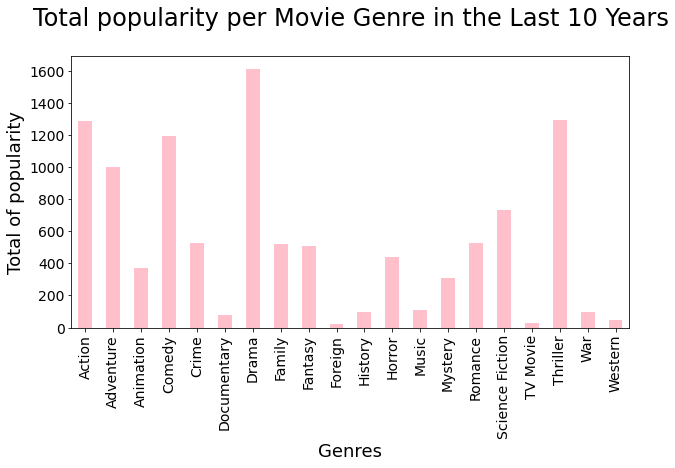

In [40]:
popularity_chart = df_last_10_year.groupby('genre').popularity.sum()
popularity_chart.plot(kind='bar',color='pink',figsize=(10,5), fontsize=14)
plt.title('Total popularity per Movie Genre in the Last 10 Years',fontsize=24, pad = 30)
plt.xlabel("Genres",fontsize=18)
plt.ylabel("Total of popularity",fontsize=18);

#### From the above bar chart, we can notice that Drama movies have the most popularity *(1614.97)* in the last ten years followed by Thriller movies *(1293)*. while Foreign movies have the least popularity *(19.83)*. 
----

###  Question 2 : What is the rate of budget per genre in the last ten years?

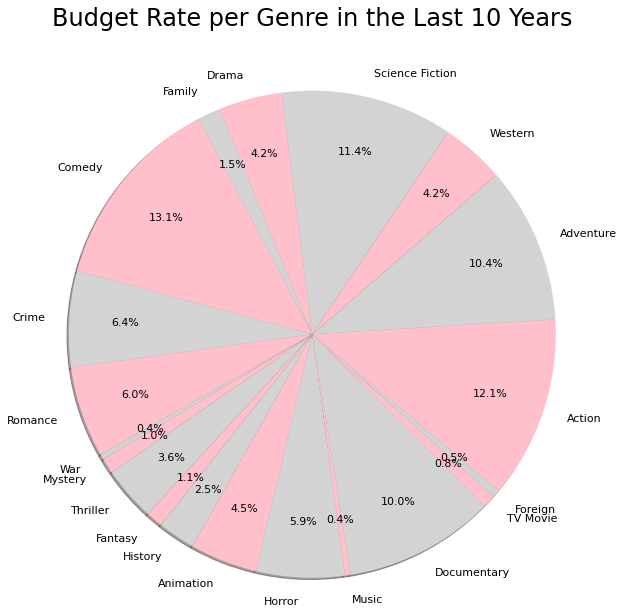

In [55]:
bud_p_gen= df_last_10_year.groupby('genre').budget.sum()
labels_list=df_last_10_year.genre.unique()
color=['pink','lightgray']
plt.title('Budget Rate per Genre in the Last 10 Years',fontsize=24, pad=200)

plt.pie(bud_p_gen,radius=2.8,labels=labels_list,colors=color,autopct='%1.1f%%', startangle = 320
        ,pctdistance=0.77,textprops={'fontsize': 11}, shadow=True);



#### Comedy movies have had the most budget rate (*which is 13.1%*) and Action movies got the second most budget rate (*which is 12.1%*) in the last ten year.
---

###  Question 3: Is there a relationship between popularity and average vote?

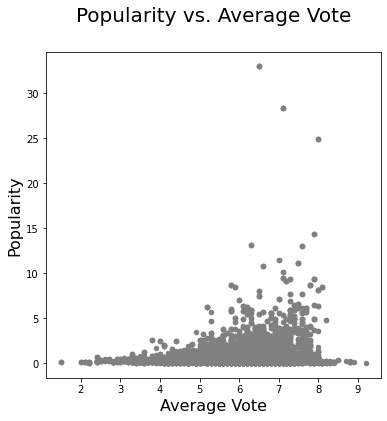

In [57]:
df_last_10_year.plot(kind='scatter',x='vote_average',y="popularity",
                     color='gray',figsize=(6,6));

plt.title("Popularity vs. Average Vote",fontsize=20, pad= 30)
plt.xlabel("Average Vote",fontsize=16)
plt.ylabel("Popularity",fontsize=16);


#### The scatter plot shows that Highly popular movies do *not necessarily* have a high average vote, which means that low-popular movies might also have a high average vote.
---

 ### Create a new data frame for the last five years of data

In [59]:
df_last_5_year = df_final.query('release_year>=2010')

###  Question 4 : Which genre has the highest number of movies generated in the last five years?

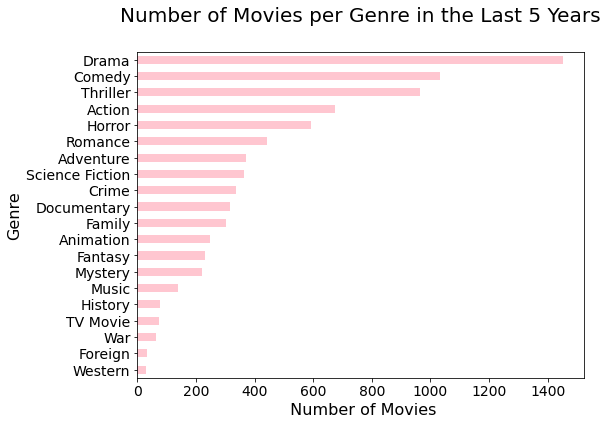

In [73]:
number_mov_per_gen = df_last_5_year.groupby("genre").id.count().sort_values()
number_mov_per_gen.plot(kind="barh",sort_columns = False, color='pink',alpha=0.9,figsize=(8,6), fontsize=14);
plt.title("Number of Movies per Genre in the Last 5 Years",fontsize=20, pad = 30)
plt.xlabel(" Number of Movies",fontsize=16)
plt.ylabel("Genre",fontsize=16);

#### In the last 5 years, the most movies generated are Drama movies (1451 movies exactly) on the other hand the Western genre movies are the lowest generated Movies, which generated just  28 movies.  
---




### Limitations
The dataset contains missing, wrong values, and duplicates rows. In addition, needed to split the genres column to ease the working.

> <font color='blue'>*So I had to clean the dataset before start answering my research questions.*</font>


###  Conclusions
>1. In the last ten year, Drama movies have had the most popularity.
>2. In the last ten year, Comedy movies have had the highest budget rate.
>3. Drama and Western genre movies have the same budget rate.
>4. The relationship between average votes and popularity is not directly proportional.
>5. Drama movies have the highest number of generated movies In the last five years.


